In [1]:
import pandas as pd

sales_data = pd.read_csv('assignment4.1a.csv')
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

promo_dates = pd.read_csv('PromotionDates.csv')
promo_dates['StartDate'] = pd.to_datetime(promo_dates['StartDate'])
promo_dates['EndDate'] = pd.to_datetime(promo_dates['EndDate'])

sales_data.head() 


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0


In [2]:
promo_dates.head()

,Period,StartDate,EndDate
0,Promo1,2015-02-10,2015-02-17
1,Promo2,2015-03-15,2015-03-22
2,Promo3,2015-05-24,2015-06-01
3,Promo4,2015-06-21,2015-06-28
4,Promo5,2015-09-01,2015-09-06


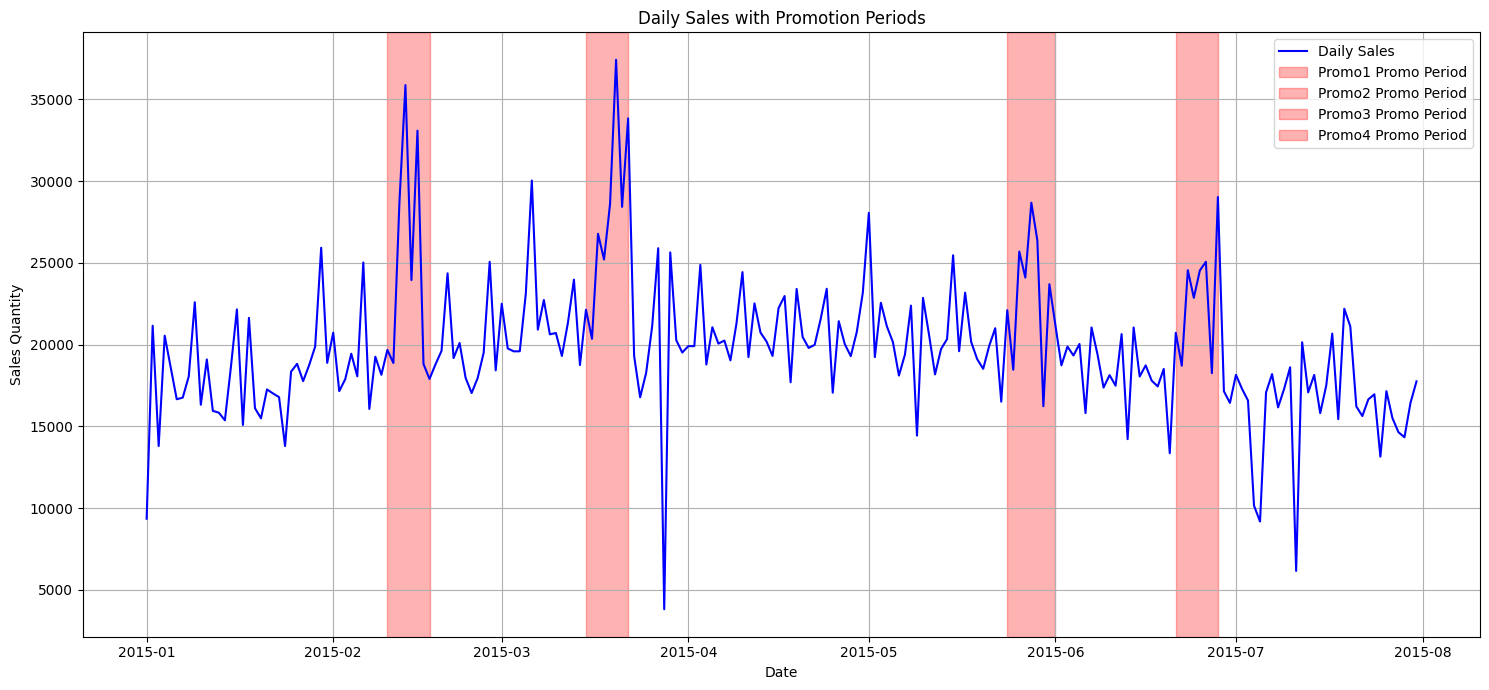

In [3]:
import matplotlib.pyplot as plt

# Group by date and sum
daily_sales = sales_data.groupby('Date').SalesQuantity.sum()

plt.figure(figsize=(15, 7))
plt.plot(daily_sales, label='Daily Sales', color='blue')

for index, row in promo_dates.iloc[:4, :].iterrows():
    plt.axvspan(row['StartDate'], row['EndDate'], color='red', alpha=0.3, label=f"{row['Period']} Promo Period" if 'Promo' not in [l.get_label() for l in plt.gca().get_lines()] else "")

plt.title('Daily Sales with Promotion Periods')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
sales_data.head() 

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0


In [5]:
sales_data['Promotion'] = 0  

# 1 for promo, else 0
for index, row in promo_dates.iloc[:4, :].iterrows():
    mask = (sales_data['Date'] >= row['StartDate']) & (sales_data['Date'] <= row['EndDate'])
    sales_data.loc[mask, 'Promotion'] = 1

sales_data['Promotion'].value_counts()


0    1562695
1     310923
Name: Promotion, dtype: int64

In [6]:
sales_data.head() 

,Date,StoreCode,ProductCode,SalesQuantity,Promotion
0,2015-01-01,8,9,-1,0
1,2015-01-01,131,9,1,0
2,2015-01-01,144,9,2,0
3,2015-01-01,203,9,2,0
4,2015-01-01,256,9,0,0


In [7]:
sales_data.groupby('StoreCode')['SalesQuantity'].sum()

StoreCode
1      12582
2      41321
3       8328
4      13412
5      10432
       ...  
336    10993
337    14256
338    11878
339    16820
340    19027
Name: SalesQuantity, Length: 340, dtype: int64

In [10]:
grouped = sales_data.groupby(['Promotion', 'Date'])['SalesQuantity'].sum().reset_index()

df = grouped[['Date','SalesQuantity','Promotion']]
df

,Date,SalesQuantity,Promotion
0,2015-01-01,9355,0
1,2015-01-02,21156,0
2,2015-01-03,13799,0
3,2015-01-04,20545,0
4,2015-01-05,18615,0
...,...,...,...
207,2015-06-24,22862,1
208,2015-06-25,24534,1
209,2015-06-26,25066,1
210,2015-06-27,18255,1


In [12]:
sales_data = df
sales_data

,Date,SalesQuantity,Promotion
0,2015-01-01,9355,0
1,2015-01-02,21156,0
2,2015-01-03,13799,0
3,2015-01-04,20545,0
4,2015-01-05,18615,0
...,...,...,...
207,2015-06-24,22862,1
208,2015-06-25,24534,1
209,2015-06-26,25066,1
210,2015-06-27,18255,1


In [13]:
sales_data.head()

,Date,SalesQuantity,Promotion
0,2015-01-01,9355,0
1,2015-01-02,21156,0
2,2015-01-03,13799,0
3,2015-01-04,20545,0
4,2015-01-05,18615,0


In [14]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = sales_data[['Promotion']]
y = sales_data['SalesQuantity']

In [15]:
from sklearn.linear_model import LinearRegression

# init linear regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

coefficients = lr_model.coef_

coef_df = pd.DataFrame(coefficients,X.columns,)
coef_df.columns = ['Coef']
coef_df

,Coef
Promotion,5550.010835


A coefficient of `Promotion` suggests that promotions have more impact on sales. Specifically, on days when a promotion is active, sales are expected to increase by approximately 0.4281 units, holding other variables constant.

In [16]:
new_sales_data = pd.read_csv('assignment4.1b.csv')
new_sales_data['Date'] = pd.to_datetime(new_sales_data['Date'])

new_sales_data.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1


In [17]:
promo5_start_date = promo_dates.loc[promo_dates['Period'] == 'Promo5', 'StartDate'].values[0]
promo5_end_date = promo_dates.loc[promo_dates['Period'] == 'Promo5', 'EndDate'].values[0]
promo5_start_date

numpy.datetime64('2015-09-01T00:00:00.000000000')

In [18]:
promo5_start_date = promo_dates.loc[promo_dates['Period'] == 'Promo5', 'StartDate'].values[0]
promo5_end_date = promo_dates.loc[promo_dates['Period'] == 'Promo5', 'EndDate'].values[0]

# set promo for 5th
sales_data['Promotion'] = sales_data['Date'].apply(lambda x: 1 if promo5_start_date <= x <= promo5_end_date else 0)

# set promo for 5th in the new sales data
new_sales_data['Promotion'] = new_sales_data['Date'].apply(lambda x: 1 if promo5_start_date <= x <= promo5_end_date else 0)

new_sales_data['Promotion'].value_counts()


0    986646
1     41475
Name: Promotion, dtype: int64

In [19]:
new_sales_data[new_sales_data['Date'] == '2015-09-02']

,Date,StoreCode,ProductCode,SalesQuantity,Promotion
242492,2015-09-02,1,7,0,1
242493,2015-09-02,1,41,2,1
242494,2015-09-02,1,53,0,1
242495,2015-09-02,1,60,1,1
242496,2015-09-02,1,74,0,1
...,...,...,...,...,...
250359,2015-09-02,340,299,2,1
250360,2015-09-02,340,300,0,1
250361,2015-09-02,340,306,0,1
250362,2015-09-02,340,307,4,1


In [20]:
grouped = new_sales_data.groupby(['Promotion', 'Date'])['SalesQuantity'].sum().reset_index()
grouped

,Promotion,Date,SalesQuantity
0,0,2015-08-01,14652
1,0,2015-08-02,19566
2,0,2015-08-03,16859
3,0,2015-08-04,15556
4,0,2015-08-05,15657
...,...,...,...
149,1,2015-09-02,20115
150,1,2015-09-03,21745
151,1,2015-09-04,20258
152,1,2015-09-05,14761


In [21]:

new_sales_data = grouped[['Date','SalesQuantity','Promotion']]
new_sales_data.head()

,Date,SalesQuantity,Promotion
0,2015-08-01,14652,0
1,2015-08-02,19566,0
2,2015-08-03,16859,0
3,2015-08-04,15556,0
4,2015-08-05,15657,0


In [22]:
new_sales_data

,Date,SalesQuantity,Promotion
0,2015-08-01,14652,0
1,2015-08-02,19566,0
2,2015-08-03,16859,0
3,2015-08-04,15556,0
4,2015-08-05,15657,0
...,...,...,...
149,2015-09-02,20115,1
150,2015-09-03,21745,1
151,2015-09-04,20258,1
152,2015-09-05,14761,1


In [23]:
new_sales_data[new_sales_data['Date'] == '2015-09-02']

,Date,SalesQuantity,Promotion
149,2015-09-02,20115,1


In [24]:
 new_sales_data[['Promotion']]

,Promotion
0,0
1,0
2,0
3,0
4,0
...,...
149,1
150,1
151,1
152,1


In [25]:
new_sales_data['SalesQuantity']

0      14652
1      19566
2      16859
3      15556
4      15657
       ...  
149    20115
150    21745
151    20258
152    14761
153    19527
Name: SalesQuantity, Length: 154, dtype: int64

In [26]:
X_new = new_sales_data[['Promotion']]
y_true = new_sales_data['SalesQuantity']

#predictions for Promo5 period
y_pred = lr_model.predict(X_new)


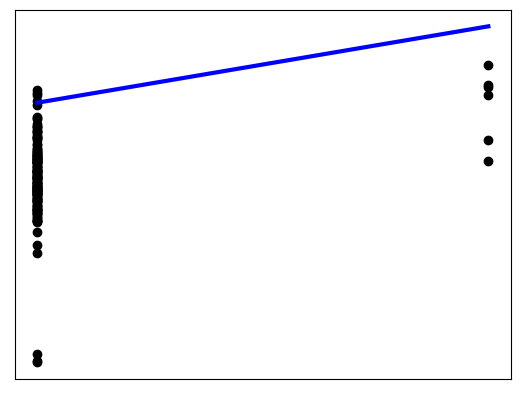

In [27]:
plt.scatter(X_new, y_true, color="black")
plt.plot(X_new, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [29]:
lr_model.score(X_new,y_true)

-3.0932984807290085

In [30]:
import seaborn as sns

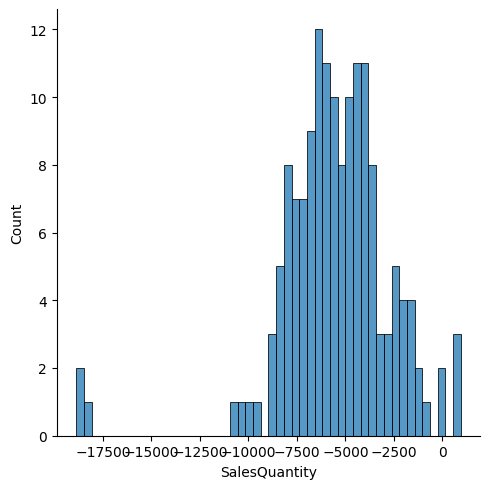

In [31]:
sns.displot((y_true-y_pred),bins=50);